<font colo="green" size=6>Fashion MNIST

* We will be using the Keras API for this 


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import fashion_mnist
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import MaxPool2D
from keras.layers import Conv2D
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
import numpy as np



In [4]:
(X_train,Y_train),(X_test,y_test)=fashion_mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

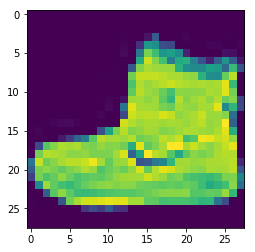

In [8]:
plt.imshow(X_train[0])

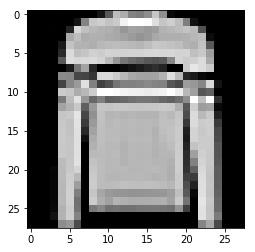

In [9]:
plt.imshow(X_train[5],cmap="gray")

In [11]:
print(Y_train[0])

9


In [12]:
print(Y_train[5])

2


In [13]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

y_train_cat=to_categorical(Y_train,10)
y_test_cat=to_categorical(y_test,10)

In [14]:
k.clear_session()

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',
             metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [16]:
model.fit(X_train,y_train_cat,batch_size=128,epochs=3,verbose=1,
          validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 59s 1ms/step - loss: 0.6002 - acc: 0.7774 - val_loss: 0.5338 - val_acc: 0.8028
Epoch 2/3
42000/42000 [==============================] - 55s 1ms/step - loss: 0.3782 - acc: 0.8638 - val_loss: 0.3834 - val_acc: 0.8539
Epoch 3/3
42000/42000 [==============================] - 58s 1ms/step - loss: 0.3197 - acc: 0.8827 - val_loss: 0.3577 - val_acc: 0.8660 loss: 0.320


In [ ]:
model.evaluate(X_test,y_test_cat)  